Categorical Columns: Index(['sex', 'age_group'], dtype='object')
KNN Model Accuracy (k=8, metric=minkowski): 0.89
KNN Model Precision: 0.93
KNN Model Recall: 0.84
KNN Model F1 Score: 0.89
KNN Model ROC-AUC Score (k=8, metric=minkowski): 0.93

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61


Confusion Matrix:
 [[27  2]
 [ 5 27]]


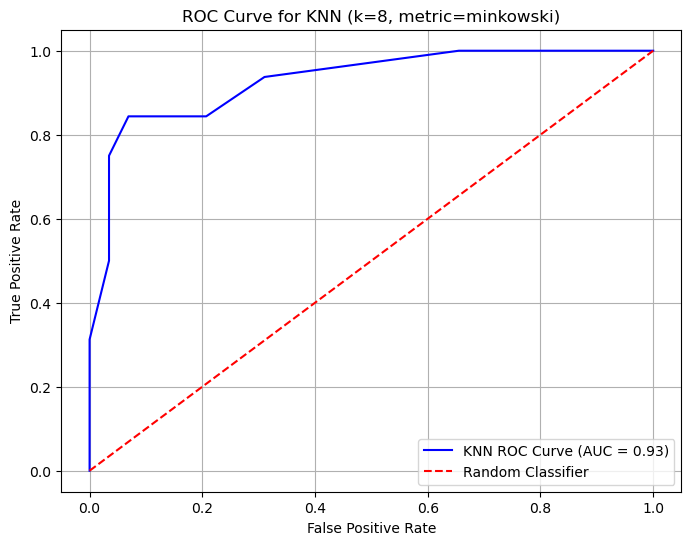


Prediction for new data with KNN (k=8): No Heart Disease


In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
)
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("heart_disease_cleaned_enhanced.csv")  

# Identify categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns
print("Categorical Columns:", categorical_cols)

# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Independent (X) and Dependent Variables (y)
X = df_encoded.drop(columns=["Target"])  # Use all features except the target
y = df_encoded["Target"]  # Target variable

# dataset splitted into Training (80%) and Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set KNN parameters
k = 8  # Number of neighbors
metric = "minkowski"  # Metric for distance calculation
p = 2  # Power parameter for Minkowski metric
weights = "uniform"  # Weight function for neighbors
algorithm = "auto"  # Algorithm for nearest neighbors

# Train a KNN Classifier with specified parameters
knn_model = KNeighborsClassifier(
    n_neighbors=k, metric=metric, p=p, weights=weights, algorithm=algorithm, n_jobs=-1
)
knn_model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]  # For ROC-AUC

# Evaluate the KNN Model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn)

print(f"KNN Model Accuracy (k={k}, metric={metric}): {accuracy_knn:.2f}")
print(f"KNN Model Precision: {precision_knn:.2f}")
print(f"KNN Model Recall: {recall_knn:.2f}")
print(f"KNN Model F1 Score: {f1_knn:.2f}")
print(f"KNN Model ROC-AUC Score (k={k}, metric={metric}): {roc_auc_knn:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

# Plot ROC Curve for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color="blue", label=f"KNN ROC Curve (AUC = {roc_auc_knn:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", label="Random Classifier")
plt.title(f"ROC Curve for KNN (k={k}, metric={metric})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

# Predict for new data
# Create a template for new data based on the feature structure of the encoded dataset
new_data_template = pd.DataFrame(columns=X.columns)
new_data_template.loc[0] = 0  #all features to 0

# Update the template with specific values for prediction
new_data_template["age"] = 67  # Older age
new_data_template["chol"] = 300  # High cholesterol
new_data_template["oldpeak"] = 3.5  # Severe ischemic changes
new_data_template["ca"] = 3  # Increased number of major vessels with blockages
new_data_template["max_heart_rate"] = 110  # Lower maximum heart rate
new_data_template["sex_Male"] = 1  # : Male
new_data_template["thal"] = 7  # Reversible defect

# Scale the new data
new_data_scaled_knn = scaler.transform(new_data_template)

# Predict the outcome
prediction_knn = knn_model.predict(new_data_scaled_knn)
print(
    "\nPrediction for new data with KNN (k=8):",
    "Heart Disease Present" if prediction_knn[0] == 1 else "No Heart Disease",
)

In [14]:
from sklearn.model_selection import cross_val_score

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    print(f"k={k}, Cross-Validation Accuracy: {scores.mean():.2f}")

k=1, Cross-Validation Accuracy: 0.68
k=2, Cross-Validation Accuracy: 0.75
k=3, Cross-Validation Accuracy: 0.78
k=4, Cross-Validation Accuracy: 0.77
k=5, Cross-Validation Accuracy: 0.77
k=6, Cross-Validation Accuracy: 0.78
k=7, Cross-Validation Accuracy: 0.80
k=8, Cross-Validation Accuracy: 0.81
k=9, Cross-Validation Accuracy: 0.80
k=10, Cross-Validation Accuracy: 0.79
k=11, Cross-Validation Accuracy: 0.79
k=12, Cross-Validation Accuracy: 0.79
k=13, Cross-Validation Accuracy: 0.79
k=14, Cross-Validation Accuracy: 0.79
k=15, Cross-Validation Accuracy: 0.79
k=16, Cross-Validation Accuracy: 0.80
k=17, Cross-Validation Accuracy: 0.79
k=18, Cross-Validation Accuracy: 0.80
k=19, Cross-Validation Accuracy: 0.80
k=20, Cross-Validation Accuracy: 0.80


In [10]:
metrics = ['minkowski', 'manhattan', 'chebyshev']
for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=8, metric=metric)
    knn.fit(X_train_scaled, y_train)
    accuracy = knn.score(X_test_scaled, y_test)
    print(f"Metric={metric}, Test Accuracy: {accuracy:.2f}")

Metric=minkowski, Test Accuracy: 0.89
Metric=manhattan, Test Accuracy: 0.82
Metric=chebyshev, Test Accuracy: 0.72


In [11]:
weights = ['uniform', 'distance']
for weight in weights:
    knn = KNeighborsClassifier(n_neighbors=8, weights=weight)
    knn.fit(X_train_scaled, y_train)
    accuracy = knn.score(X_test_scaled, y_test)
    print(f"Weight={weight}, Test Accuracy: {accuracy:.2f}")

Weight=uniform, Test Accuracy: 0.89
Weight=distance, Test Accuracy: 0.87
